### What are features ?

###### Features can be said as a characteristics of an object. Let's say we have a notebook as an object. So , the price of the notebook is determined by the quality of the page it has , the no. of pages it contains , how attractive the cover is and which company brand it is.
###### Here, we can consider price of the notebook as a target variable or a label. Based on the characteristics or features of the notebook , the price is decided.

### Why are features necessary and what important role does it play in machine learning ?

##### Let's say , you are buying a laptop which has cool look and design and color. It comes at a higher rate as compared to other laptops. Other laptops may not be so good in design and looks but has really good internal specifications like RAM, HDD, Graphics Card, Processor ,etc. 
##### As a human brain thinks , you will go with the ones having good specifications rather than the looks of it.
### The Price of a laptop is determined on the specifications  or the kind of hardware it contains rather than the looks or design of it
##### In Machine Learning , features are the building blocks of the dataset.The quality of features in your dataset has a major impact on the quality of insights you will incur while using that dataset for Machine Learning. However, depending on the different business problems in different industries, it is not necessary that the features should be the same features. So, you need to strongly understand the business goal of your data science project or a machine learning project.

### Why do we need feature selection in Machine Learning ?

##### As stated in the above example of buying a laptop , you will look for all the features of a laptop according to your requirements.
##### If a dataset has various laptop specifications also including color , design and the company name which it manufactures , you will mostly exclude the color and design of the laptop and will select only the best features a laptop should have as per your requirements.


###### When a dataset has too many features, it would not be ideal to include all of them in our machine learning model. Some features may be irrelevant for the independent variable. For example, if you are going to predict how much it would cost to crush a car, and the features you’re given are:
###### 1. the dimensions of the car
###### 2. if the car will be delivered to the crusher or the company has to go pick it up
###### 3. if the car has any fuel in the tank
###### 4. the color of the car
###### From the above example , we can clearly see that color of the car does not have any effect on the crushing of the car. So , it does not make sense to use that such kind of feature in the model or else , it is going to make the model more complex reducing the accuracy.

##### Top reasons to use feature selection are:

###### 1. It enables the machine learning algorithm to train faster.
###### 2. It reduces the complexity of a model and makes it easier to interpret.
###### 3. It improves the accuracy of a model if the right subset is chosen.
###### 4. It reduces overfitting.

### Illustration :

##### Let's take an example of House data.
##### Business Problem/Objective : To predict the price of the house . Our goal is to develop a model that has the capacity of predicting the value of houses

### Importing relevant libraries 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [107]:
# Loading the dataset 
Data = pd.read_csv(r'Real Estate.csv')
Data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [73]:
#dropping the id and date column
Data = Data.drop(['id','date'], axis = 1)

In [108]:
##after dropping columns
Data.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


##### Here, we will try to build the model with all the features mentioned and try to calculate the accuracy of the model. The target variable is "MEDV". 
##### We are trying to understand the concept of feature selection here . So , the Data Preprocessing steps are not done here to make it short and simple.

### Taking the dependent and the independent features for the model 


In [109]:
X = Data.iloc[:, :-1].values #independent features 
y = Data.iloc[:,-1].values #dependent features

### Splitting the data and fitting the data.

###### Here , we are using a simple linear regression model for illustration.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
regressorModel = LinearRegression()
regressorModel.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Making Prediction 

In [111]:
prediction = regressorModel.predict(X_test)

### Evaluating Metrics 

In [112]:
r2_score(y_test, prediction)

0.6136053487327291

###### For this project, we will calculate the coefficient of determination, R², to quantify the model’s performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how “good” that model is at making predictions.
###### The values for R² range from 0 to 1, which captures the percentage of squared correlation between the predicted and actual values of the target variable.
###### A model with an R² of 0 is no better than a model that always predicts the mean of the target variable.
###### Whereas a model with an R² of 1 perfectly predicts the target variable.
###### Any value between 0 and 1 indicates what percentage of the target variable, using this model, can be explained by the features.
###### A model can be given a negative R2 as well, which indicates that the model is arbitrarily worse than one that always predicts the mean of the target variable.

### Using feature selection techniques 

##### Here ,we are going to use Correlation Coefficient Matrix which is one of the techniques used to determine the relationship between the features.In short, it quantifies and summarize the relationship between features or variables.
##### This correlation matrix is closely related witn covariance matrix, in fact it is a rescaled version of the covariance matrix, computed from standardize features.
##### It is a square matrix (with the same number of columns and rows) that contains the Person’s r correlation coefficient.

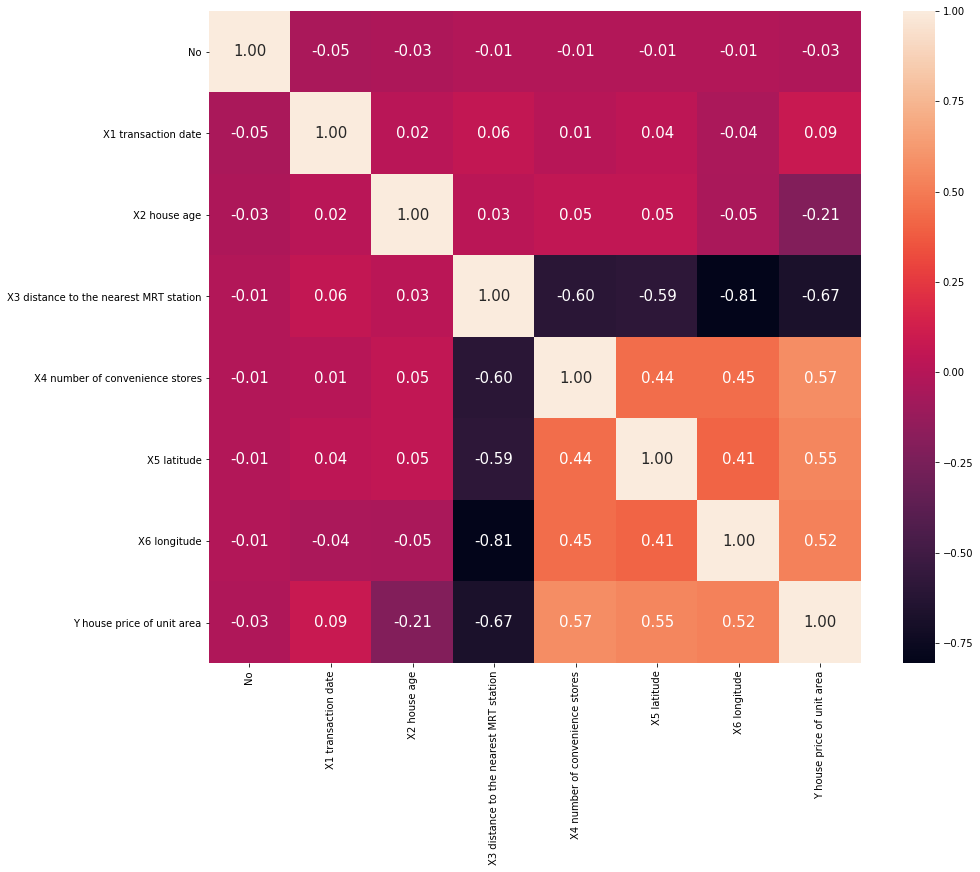

In [113]:
plt.figure(figsize=(15,12))
sns.heatmap(Data.corr(),cbar=True,
                annot=True,
                square=True,
                fmt='.2f',
                annot_kws={'size': 15},
                yticklabels=Data.columns,
                xticklabels=Data.columns)

##### The color bar on the right shows the measure of the relationship between the features. This measure ranges from  -1 to +1.
##### -1 shows that it has negative correlation and +1 shows it has positive correlation. 0 shows no correlation or no relationship between the features 

#### Let's select the features X1 transaction date,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude

In [118]:
### Taking the dependent and the independent features for the model again 


features = Data[['X1 transaction date','X3 distance to the nearest MRT station','X4 number of convenience stores','X5 latitude','X6 longitude']] #independent features
prices = Data['Y house price of unit area']

### Splitting the data and fitting the data 

###### Here , we are using a simple linear regression model for illustration.

X_train, X_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state = 42)
regressorModel = LinearRegression()
regressorModel.fit(X_train,y_train)

### Making Prediction 

prediction = regressorModel.predict(X_test)

In [119]:

### Evaluating Metrics 

r2_score(y_test, prediction)

0.6245190257672815

#### We can clearly see that after all selecting all the features , we get R2-score : 0.6136053487327291 
#### After selecting some features having strong relationship with the target variable , we get R2-score : 0.6245190257672815

### Hence , we can see from the above example why feature selection is important in Machine Learning .

### Feature Importance  Calculation 

#### Another simple yet effective method is to identify the importance of the features using the feature calculation method

In [1]:
from sklearn.datasets import make_regression

#### The regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

In [2]:
#### The regression dataset will have 1,000 examples, with 10 input features, five of which will be informative and the remaining five that will be redundant.

##defining data set
X,y = make_regression(n_samples=1000,n_features=10,n_informative=5,random_state=1)


In [6]:
# summarizing the data set
print(X.shape,y.shape)

(1000, 10) (1000,)


In [7]:
#defining a model 
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
## getting the coefficients 
importance = model.coef_

In [9]:

##displaying the coefficients
for i,c in enumerate(importance):
    print("Features :%0d , Coefficients :%.5f"%(i,c))

Features :0 , Coefficients :-0.00000
Features :1 , Coefficients :12.44483
Features :2 , Coefficients :0.00000
Features :3 , Coefficients :-0.00000
Features :4 , Coefficients :93.32225
Features :5 , Coefficients :86.50811
Features :6 , Coefficients :26.74607
Features :7 , Coefficients :3.28535
Features :8 , Coefficients :0.00000
Features :9 , Coefficients :0.00000


Text(0.5, 1.0, 'Feature Importance in Linear Regresssion')

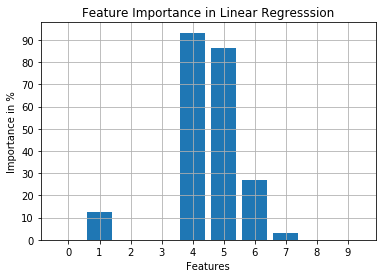

In [10]:
##plotting feature importance 
plt.bar([x for x in range(len(importance))],importance)
plt.xticks(range(0,10))
plt.yticks(range(0,100,10))
plt.grid()
plt.xlabel("Features")
plt.ylabel("Importance in %")
plt.title("Feature Importance in Linear Regresssion")

### From the above graph , we can surely say that out of 10 features (including 0 ), 4 of them are most important 